In [2]:
import pandas as pd

In [12]:
data = pd.read_csv('spotify-2023.csv', encoding='latin1')


In [14]:
data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [16]:
# Convert 'streams' column to numeric, replacing errors with NaN
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')

# Drop rows where streams are NaN (optional)
data.dropna(subset=['streams'], inplace=True)

# Confirm the cleaning
data['streams'].describe()


count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64

In [18]:
data.describe()


,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,9.520000e+02,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000
mean,1.556723,2018.288866,6.038866,13.944328,5202.565126,12.022059,5.141374e+08,67.866597,51.963235,2.669118,122.553571,66.984244,51.406513,64.274160,27.078782,1.582983,18.214286,10.138655
std,0.893331,11.011397,3.564571,9.197223,7901.400683,19.582405,5.668569e+08,86.470591,50.628850,6.038152,28.069601,14.631282,23.480526,16.558517,26.001599,8.414064,13.718374,9.915399
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,2.762000e+03,0.000000,0.000000,0.000000,65.000000,23.000000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,874.500000,0.000000,1.416362e+08,13.000000,7.000000,0.000000,99.750000,57.000000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2216.500000,3.000000,2.905309e+08,34.000000,38.500000,0.000000,121.000000,69.000000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5573.750000,16.000000,6.738690e+08,88.000000,87.000000,2.000000,140.250000,78.000000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,3.703895e+09,672.000000,275.000000,58.000000,206.000000,96.000000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [22]:
# Select only numeric columns from the dataset
numeric_data = data.select_dtypes(include='number')

# Now compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
correlation_matrix



,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artist_count,1.000000,0.085614,0.037117,-0.018493,-0.102184,-0.018916,-0.136463,-0.051487,-0.089336,-0.004022,-0.038680,0.206543,0.128712,0.137317,-0.101619,-0.050359,0.042681,0.119486
released_year,0.085614,1.000000,0.071055,0.169733,-0.397519,0.067564,-0.230803,-0.203799,-0.040950,0.094321,-0.007448,0.184904,-0.055354,0.097502,-0.129000,-0.015575,-0.006285,0.131884
released_month,0.037117,0.071055,1.000000,0.078391,-0.105308,-0.048594,-0.024938,-0.001054,-0.020618,-0.005948,-0.039962,-0.047893,-0.117267,-0.083378,0.053357,0.033742,-0.012492,0.038821
released_day,-0.018493,0.169733,0.078391,1.000000,-0.080191,0.020996,0.010598,0.025555,0.009586,0.072718,-0.030873,0.047613,0.044332,0.051022,-0.006938,0.019022,0.001436,-0.016911
in_spotify_playlists,-0.102184,-0.397519,-0.105308,-0.080191,1.000000,0.164182,0.789822,0.708258,0.271162,0.144227,-0.019739,-0.106885,-0.021585,0.033899,-0.064683,-0.028194,-0.046725,-0.089973
in_spotify_charts,-0.018916,0.067564,-0.048594,0.020996,0.164182,1.000000,0.245821,0.233057,0.551985,0.600101,0.034435,0.029475,0.036205,0.082124,-0.055513,-0.010270,-0.047619,-0.082267
streams,-0.136463,-0.230803,-0.024938,0.010598,0.789822,0.245821,1.000000,0.772063,0.320234,0.228598,-0.002438,-0.105457,-0.040831,-0.026051,-0.004485,-0.044902,-0.048337,-0.112333
in_apple_playlists,-0.051487,-0.203799,-0.001054,0.025555,0.708258,0.233057,0.772063,1.000000,0.414184,0.368862,0.023450,-0.025945,0.057749,0.052807,-0.062299,-0.057349,-0.049662,-0.108515
in_apple_charts,-0.089336,-0.040950,-0.020618,0.009586,0.271162,0.551985,0.320234,0.414184,1.000000,0.383443,0.030500,-0.026260,0.048868,0.105199,-0.077692,-0.013356,-0.018839,-0.152440
in_deezer_charts,-0.004022,0.094321,-0.005948,0.072718,0.144227,0.600101,0.228598,0.368862,0.383443,1.000000,0.027834,0.070510,0.076711,0.094773,-0.029732,0.005312,-0.007610,-0.080920


In [24]:
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

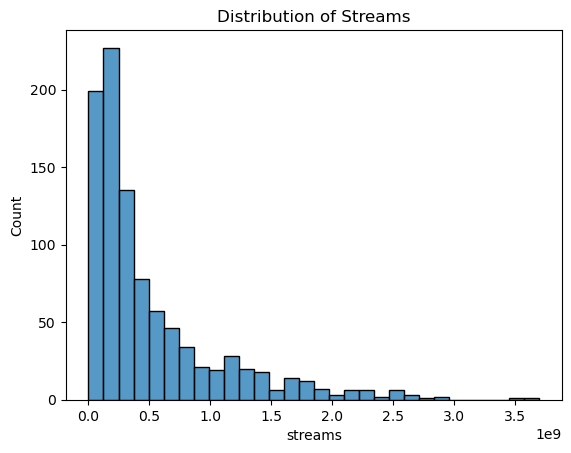

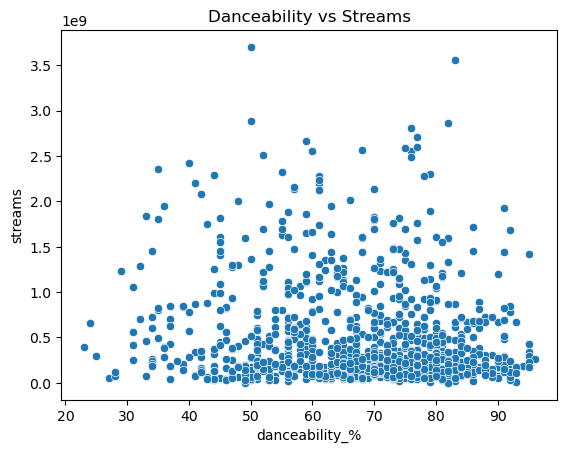

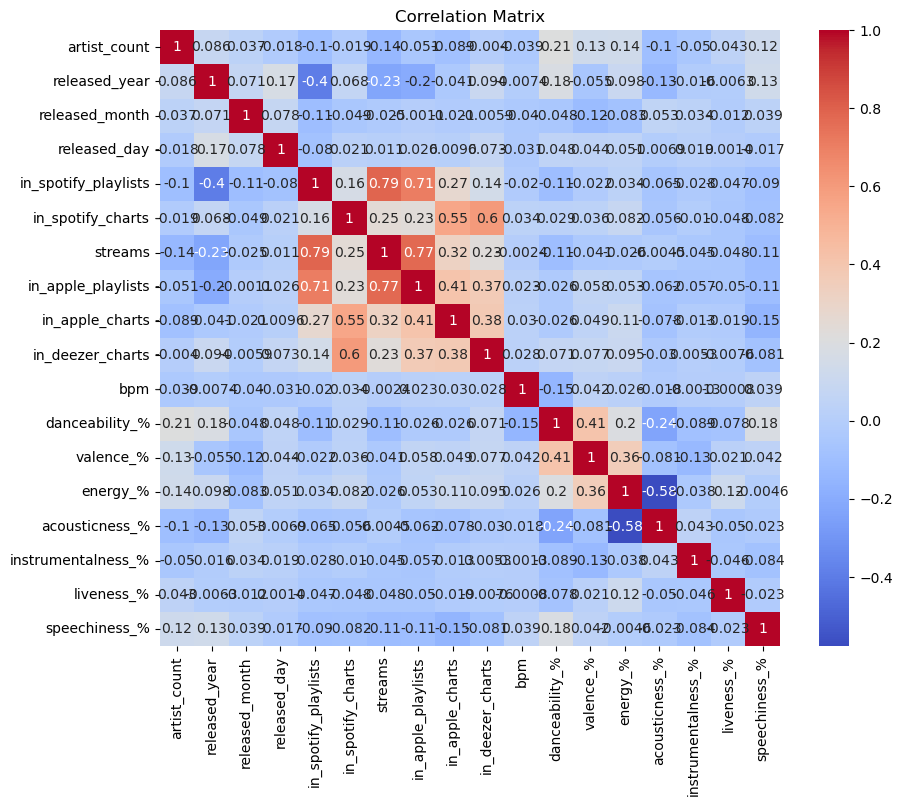

In [26]:
# Distribution of streams
sns.histplot(data['streams'], bins=30)
plt.title('Distribution of Streams')
plt.show()

# Scatter plot: Danceability vs Streams
sns.scatterplot(x='danceability_%', y='streams', data=data)
plt.title('Danceability vs Streams')
plt.show()

# Heatmap for the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
#Export the Cleaned Data after EDA
data.to_csv('cleaned_spotify_data.csv', index=False)
